# Importing the Libraroes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')

In [4]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [6]:
df.shape

(500, 2)

In [7]:
df.size

1000

# Preparing data for model

In [8]:
x = np.array(df.Temperature)
y = np.array(df.Revenue)

splitting the dataset

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0, bootstrap=True)

In [11]:
model.fit(x_train.reshape(-1,1), y_train.ravel())

RandomForestRegressor(max_depth=5, random_state=0)

In [12]:
y_pred = model.predict(x_test.reshape(-1,1))

In [13]:
pred = pd.DataFrame({'Actual': y_test.reshape(-1), 'Predicted': y_pred.reshape(-1)})
pred.head()

,Actual,Predicted
0,704.281439,691.499053
1,632.901914,648.227777
2,662.558990,660.305300
3,449.813300,463.670504
4,636.298374,661.160531


Text(0, 0.5, 'Revenue')

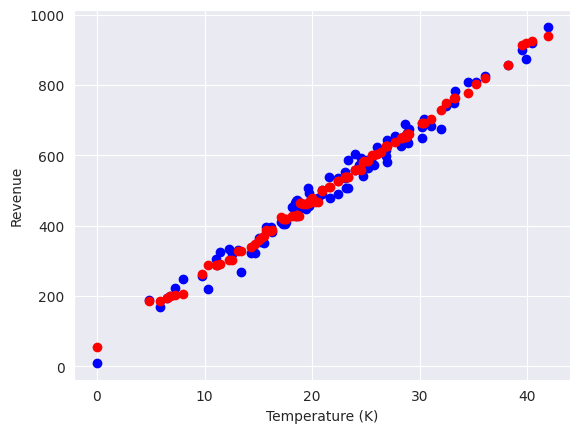

In [14]:
plt.scatter(x_test, y_test, color='blue')
plt.scatter(x_test, y_pred, color='red')
plt.xlabel('Temperature (K)')
plt.ylabel('Revenue')

<Axes: >

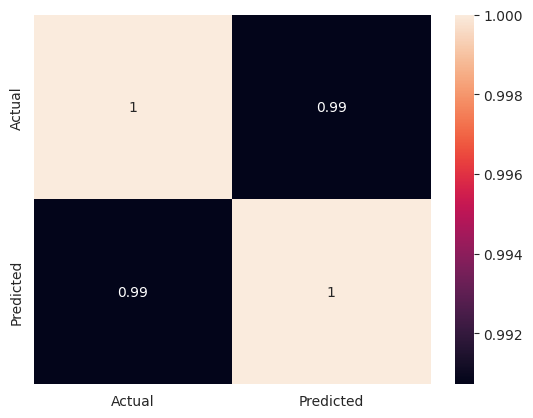

In [19]:
sns.heatmap(pred.corr(), annot=True)

<Axes: >

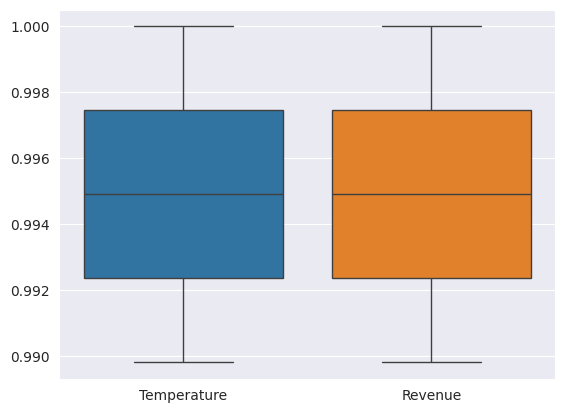

In [18]:
sns.boxplot(df.corr())

In [23]:
model.score(x_test.reshape(-1,1), y_test.ravel())

0.981291572029829

In [20]:
r2_score(y_test, y_pred)

0.981291572029829

# car prize prediction

In [61]:
car_df = pd.read_csv('https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/cardekho_data.csv')

In [62]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [63]:
car_df.shape

(301, 9)

In [64]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [65]:
car_df['no_of_years'] = 2024-car_df['Year']
car_df.head()   

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [66]:
car_df.drop(['Year', 'Car_Name'], axis=1, inplace=True)
car_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [67]:
new_df = pd.get_dummies(car_df)
new_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,10,False,False,True,True,False,False,True
1,4.75,9.54,43000,0,11,False,True,False,True,False,False,True
2,7.25,9.85,6900,0,7,False,False,True,True,False,False,True
3,2.85,4.15,5200,0,13,False,False,True,True,False,False,True
4,4.60,6.87,42450,0,10,False,True,False,True,False,False,True


In [70]:
new_df.Fuel_Type_CNG.astype(int)
new_df.Fuel_Type_Diesel.astype(int)
new_df.Fuel_Type_Petrol.astype(int)
new_df.Transmission_Automatic.astype(int)
new_df.Transmission_Manual.astype(int)
new_df.Seller_Type_Dealer.astype(int)
new_df.Seller_Type_Individual.astype(int)

AttributeError: 'DataFrame' object has no attribute 'Fuel_Type_CNG'

In [69]:
new_df.drop(['Fuel_Type_CNG', 'Seller_Type_Dealer', 'Transmission_Automatic'], axis=1, inplace=True)
new_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,False,True,False,True
1,4.75,9.54,43000,0,11,True,False,False,True
2,7.25,9.85,6900,0,7,False,True,False,True
3,2.85,4.15,5200,0,13,False,True,False,True
4,4.60,6.87,42450,0,10,True,False,False,True


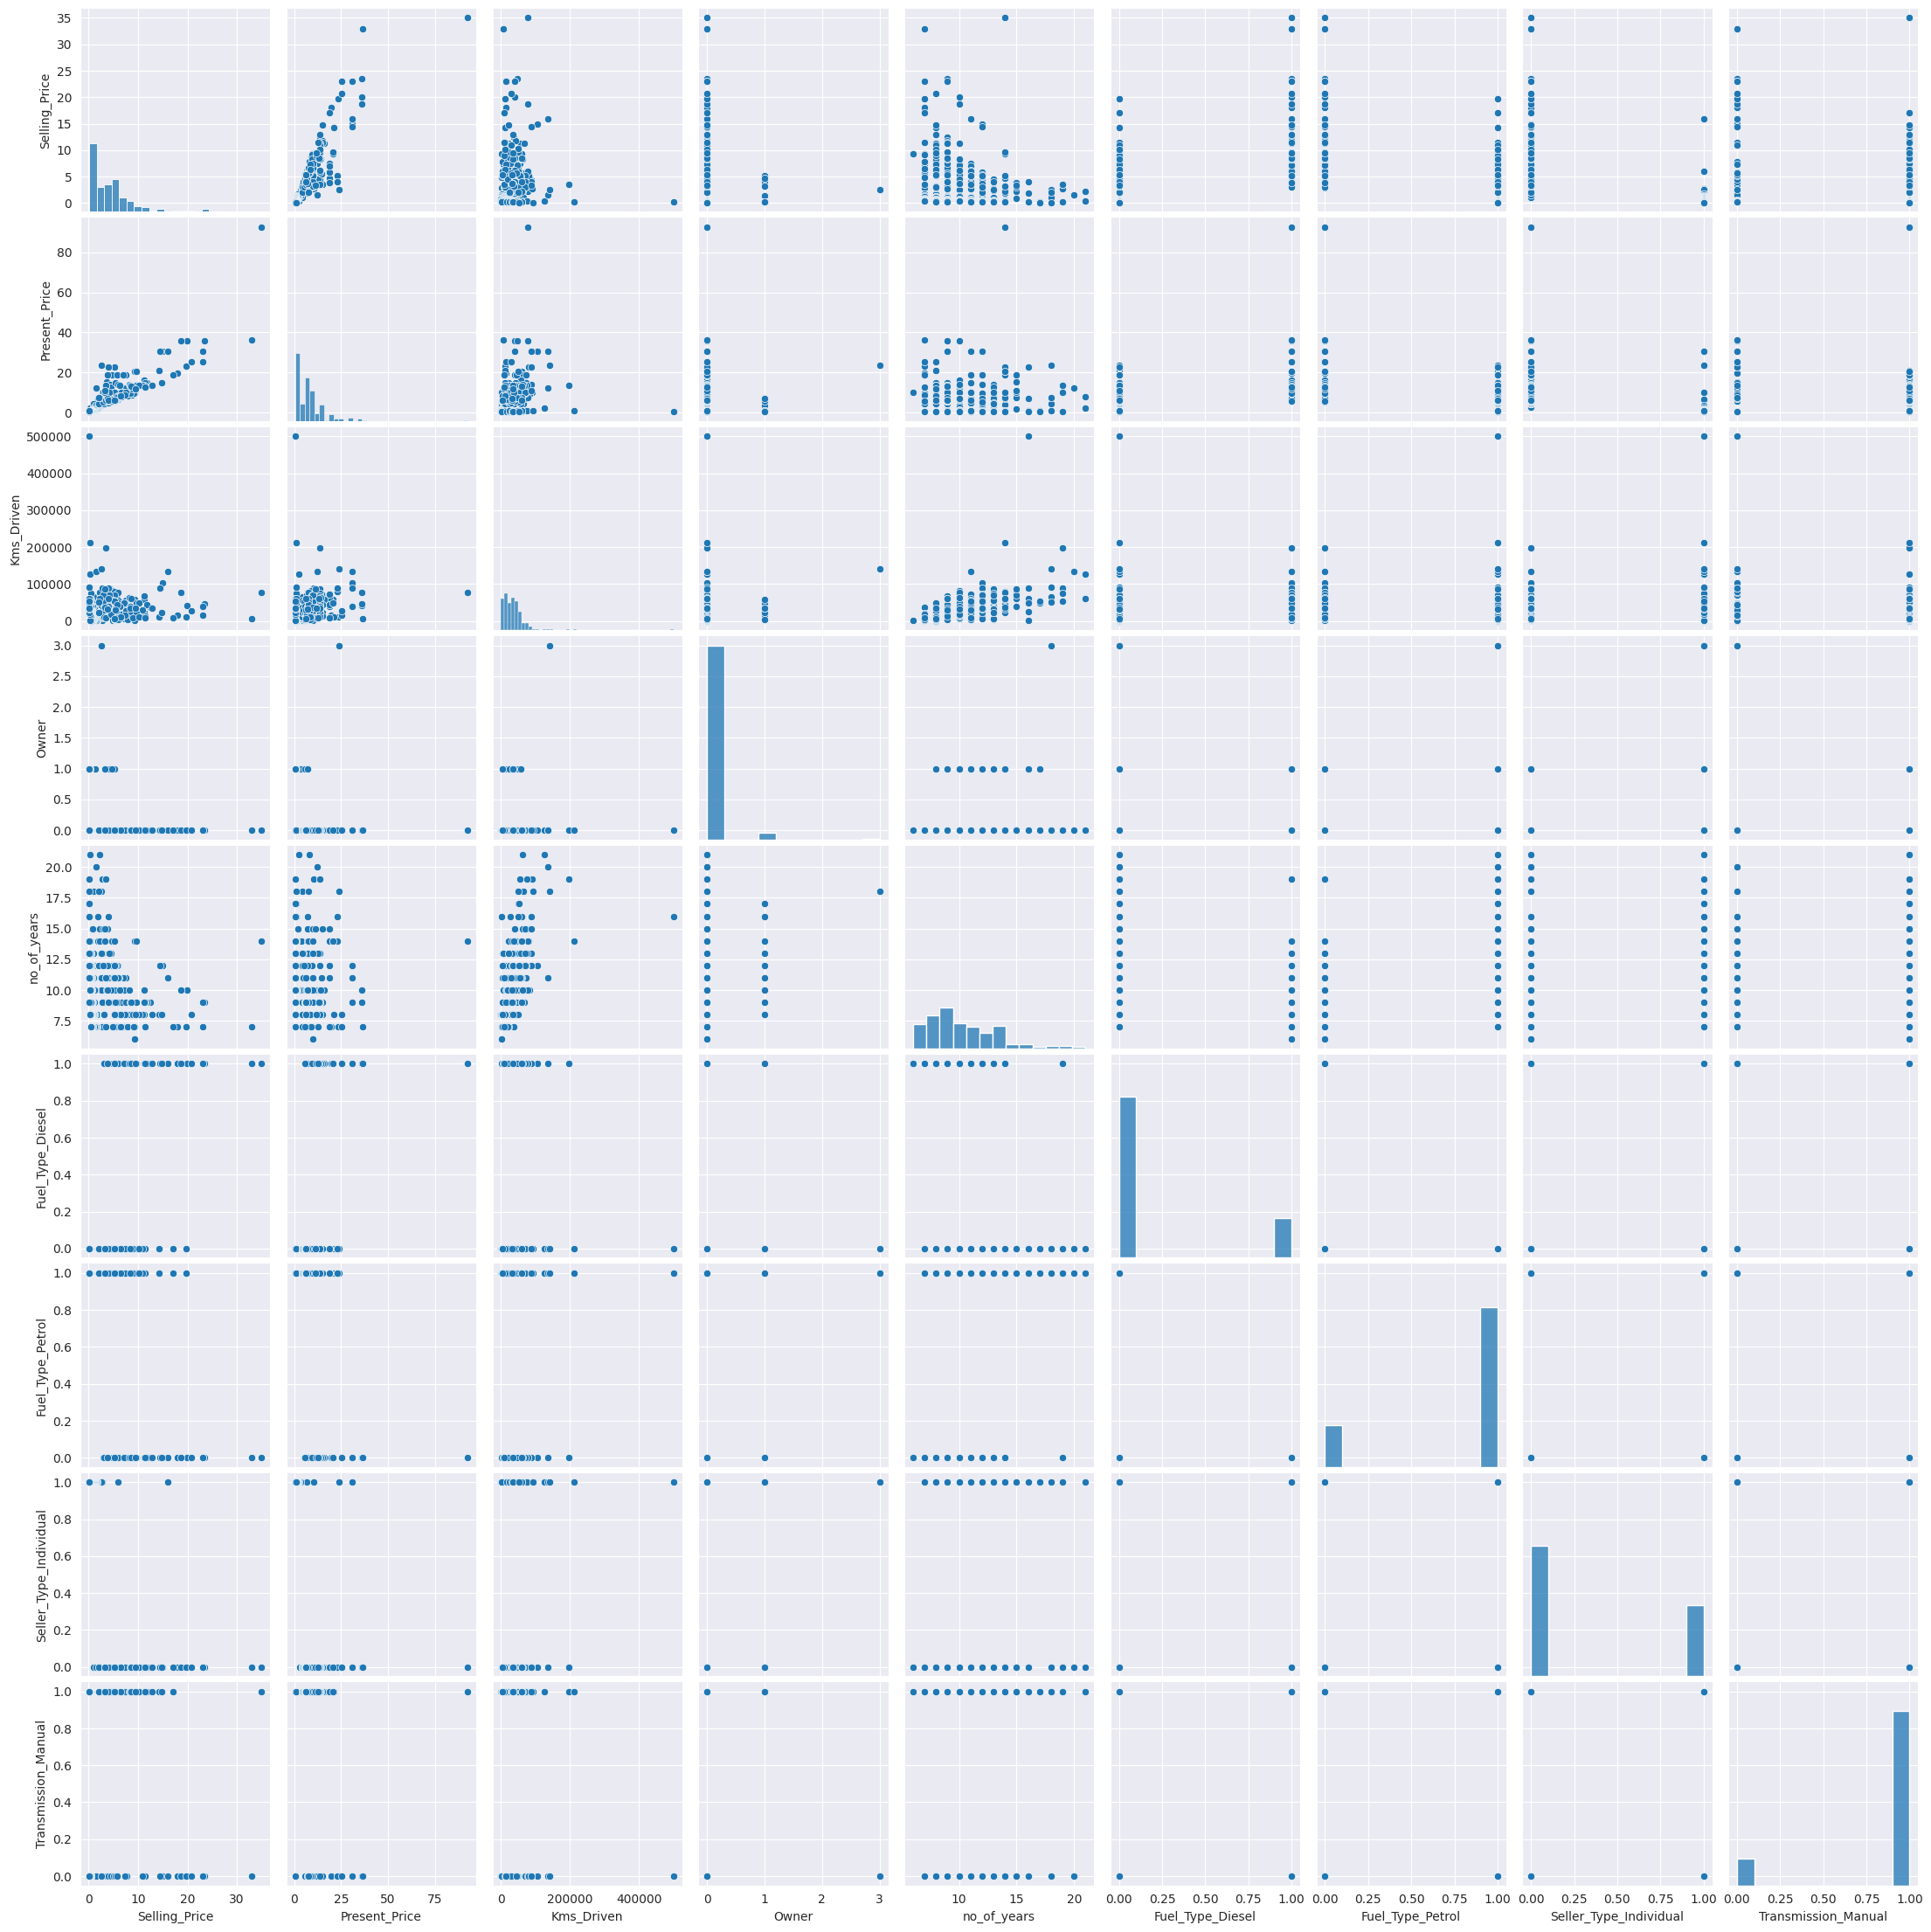

In [71]:
sns.pairplot(new_df)

<Axes: >

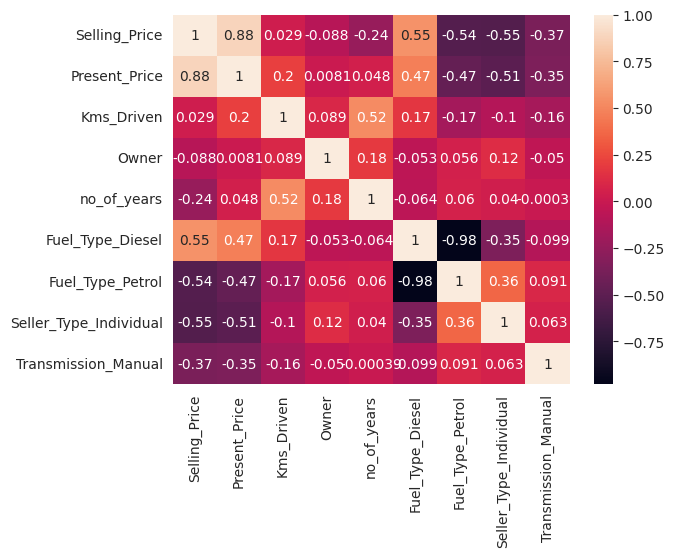

In [72]:
sns.heatmap(new_df.corr(), annot=True)

In [83]:
x = new_df.iloc[:, 1:]
y = new_df.iloc[:, 0]

# Feature Selection (feature importance)

In [84]:
from sklearn.ensemble import ExtraTreesRegressor

In [87]:
model = ExtraTreesRegressor(n_estimators=100, random_state=0)
model.fit(x, y)

ExtraTreesRegressor(random_state=0)

In [88]:
model.feature_importances_

array([0.37610063, 0.03930708, 0.00042836, 0.07708329, 0.22778519,
       0.01495647, 0.12761527, 0.13672371])

<Axes: >

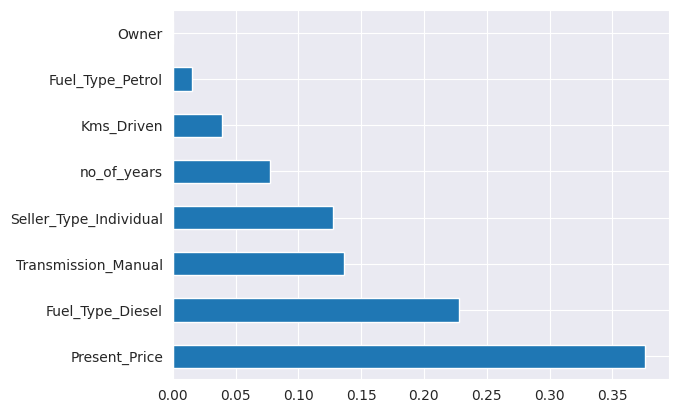

In [90]:
imp = pd.Series(model.feature_importances_, index=x.columns)
imp.nlargest(10).plot(kind='barh')

# splitting the data

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [97]:
x_test

,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
223,9.400,61381,0,9,True,False,False,True
150,0.826,6000,0,13,False,True,True,True
226,5.700,24678,0,9,False,True,False,True
296,11.600,33988,0,8,True,False,False,True
52,19.770,15000,0,7,True,False,False,False
...,...,...,...,...,...,...,...,...
137,0.787,16000,0,11,False,True,True,True
227,4.430,57000,0,13,False,True,False,True
26,5.870,55138,0,11,False,True,False,True
106,3.450,16500,1,10,False,True,True,True


In [108]:
regression = RandomForestRegressor()

# Hyper Parameter Tuning

In [109]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=6)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [110]:
from sklearn.model_selection import RandomizedSearchCV

In [111]:
final_regressor = RandomizedSearchCV(estimator=regression, param_distributions=random_grid, cv=5, random_state=42, n_jobs=1, scoring='neg_mean_squared_error', verbose=2)

In [120]:
final_regressor.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=900; total time=   0.7s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=900; total time=   0.7s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=900; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=900; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=900; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1100; total time=   0.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=110

/home/bhavin/DataspellProjects/Data-Scientist-Industrial-Training/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/bhavin/DataspellProjects/Data-Scientist-Industrial-Training/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/bhavin/DataspellProjects/Data-Scientist-Industrial-Training/venv/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/b

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [121]:
final_regressor.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [122]:
y_pred = final_regressor.predict(x_test)

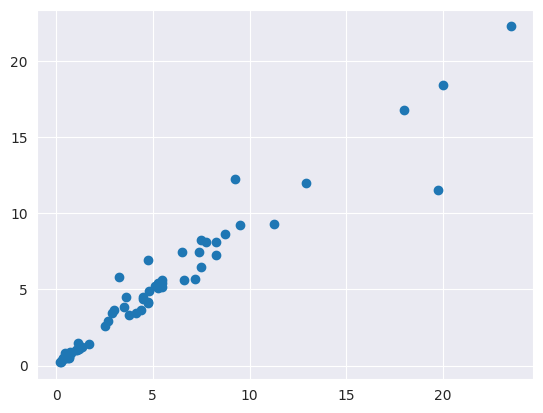

In [125]:
plt.scatter(y_test, y_pred)

In [124]:
r2_score(y_test, y_pred)

0.9291009741267973